In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def gera_matriz(num_matriz, n):
    """ 
    Retorna as matrizes que serão utilizadas pelo algoritmo
    
    Parameters
    -------------
    num_matriz : int
        Um inteiro (1 ou 2), que representa qual o formato da matriz que deve ser retornada
    
    n : int
        Um inteiro que é a dimensão da matriz que deve ser retornada
    
    Returns
    -------------
    A : np.array
        Caso num_matriz seja 1, retorna um np.array de dimensão nxn que 
        representa a matriz que será utilizada na simulação,
        caso num_matriz seja 2, retornará as duas matrizes de dimensões nxn
        que serão utilizadas na simulação.
    """
    
    B = np.random.random_sample((n,n))
    A = np.zeros((n, n))
    if num_matriz == 1:
        A = B+B.T
        return A
        
    else:
        autovalores_1 = [10.71, 12.64, 14.86,  4.07, 11.29,  3.05, 10.12, 3.51,  6.35, 13.02] #autovalores próximos
        autovalores_2 = [ 1.53,  9.26, 18.75, 13.88,  5.41, 10.77, 12.31, 9.78, 11.35, 10.92] # autovalores distantes
        D_1 = np.diag(np.array(autovalores_1)[:n])
        D_2 = np.diag(np.array(autovalores_2)[:n])
        B_inv = np.linalg.inv(B)
        A_1 = B @ D_1 @ B_inv
        A_2 = B @ D_2 @ B_inv
        return A_1, A_2

In [16]:
class MetodoDasPotencias:
    """
    Uma classe usada para representar o método das potências,
    que é utilizado para calcular o maior autovetor e autovalor
    da matriz A  
    
    ...
    Attributes
    ------------
    x : list
        uma lista contendo todos os valores assumidos 
        por x durante a execução do algoritmo
        
    mi : list
        uma lista contendo todos os valores assumidos 
        por mi durante a execução do algoritmo
        
    A : np.array
        a matriz sobre a qual sera aplicada o método
        das potências
    
    n : int
        um inteiro que representa a dimensão da matriz 
        quadrada A
        
    it_max : int
        número de iterações máximas do algoritmo
        
    eps: float
        diferença entre o valor obtido e o valor tabelado
        a partir da qual pode-se parar a simulação
        
    erro_autovalor : list
        lista que armazena o erro entre o autovalor 
        calculado e o tabelado
        
    erro_autovetor : list
        lista que armazena o erro entre o autovetor
        calculado e o tabelado
        
    lambda_1 : float
        maior autovalor da matriz A calculado utilizando
        a biblioteca np.linalg.eig, que serve como valor 
        tabelado para calcular o erro
        
    x_estrela : np.array
        autovetor associado ao lambda_1, calculado utilizando
        a biblioteca np.linalg.eig, que serve como o
        autovetor tabelado para calcular o erro
        
    
    Methods
    -----------
    _calcula_mi()
        Calcula o mi de acordo com o método das potências
        
    _calcula_x()
        Calcula o x de acordo com o método das potências
        
    _calcula_erros()
        Calcula os erros do autovetor e do autovalor
        utilizando os valores calculados
        
    calcula_aproximacao()
        Executa as iterações até chegar em uma solução 
        para o autovetor que convirja para a solução
        tabelada
        
    gera_grafico_comparativo(titulo, savefig=False, filename="")
        Função que gera o gráfico comparativo para as ordens de
        convergência.
        
    """
    def __init__(self, A, it_max, eps):
        self.x = []
        self.mi = []
        self.n = A.shape[0]
        self.A = A
        self.it_max = it_max
        self.eps = eps
        
        #obtem os autovalores e autovetores de A
        autovalores, autovetores = np.linalg.eig(A)
        
        #salva os indices dos dois maiores autovalores
        A_argsort = np.argsort(np.abs(autovalores), axis=0)
        id_max_1 = A_argsort[-1]
        id_max_2 = A_argsort[-2]
        
        #pega os valores dos dois maiores autovetores
        lambda_1 = autovalores[id_max_1]
        lambda_2 = autovalores[id_max_2]
        
        #pega o autovetor correspondente ao maior autovalor
        x_estrela = autovetores.T[id_max_1]
        
        #garante que a primeira coordenada é sempre maior que 0
        if x_estrela[0]<0:
            x_estrela = -x_estrela
        
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.eta = abs(lambda_2/lambda_1)
        self.x_estrela = x_estrela
        
        self.erro_autovetor = []
        self.erro_autovalor = []
        return
    
    def _calcula_mi(self):
        """
        Calcula o mi de acordo com o método das potências
        """
        x_k = self.x[-1]
        mi_k = (x_k.T @ (self.A @ x_k))/(x_k.T @ x_k)
        self.mi.append(mi_k)
        return
    
    def _calcula_x(self):
        """
        Calcula o x de acordo com o método das potências
        """
        x_k = self.x[-1]
        x_k_prox = (self.A @ x_k)/(np.linalg.norm(self.A @ x_k)) 
        self.x.append(x_k_prox)
        return
    
    def _calcula_erros(self):
        """
        Calcula os erros do autovetor e do autovalor
        utilizando os valores calculados
        """
        x_k = self.x[-1]
        mi_k = self.mi[-1]
        self.erro_autovalor.append(abs(mi_k-self.lambda_1))
        self.erro_autovetor.append(np.linalg.norm(x_k-self.x_estrela))
        return
        
    
    def calcula_aproximacao(self):
        """
        Executa as iterações até chegar em uma solução 
        para o autovetor que convirja para a solução
        tabelada

        """
        x0 = np.random.rand(self.n)
        self.x.append(x0)
        self._calcula_mi()
        self._calcula_erros()

        i=1
        while i<self.it_max and self.erro_autovetor[-1]>self.eps:
            self._calcula_x()
            if self.x[-1][0]<0:
                self.x[-1] = -self.x[-1]
            self._calcula_mi()
            self._calcula_erros()
            i=i+1
    
    def gera_grafico_comparativo(self, titulo, use_tex = False, savefig=False, filename=""):
        """
        Função que gera o gráfico comparativo para as ordens de
        convergência.
        
                
        Parameters
        -------------
        titulo : String
            Uma string que será o título do gráfico
        
        
        use_tex : Boolean
            Se verdadeiro, usa latex para as legendas do gráfico, 
            no entanto, se os pacotes do latex não estiverem devidamente
            configurados no computador, pode gerar erro. Mais informações:
            <https://matplotlib.org/stable/tutorials/text/usetex.html>
            
        savefig : Boolean
            Se verdadeiro, salva o gráfico com o nome filename, no entanto é 
            necessário criar uma pasta com o nome "graficos" no mesmo diretório
            do programa
            
        filename : String
            Nome do arquivo que a imagem será salva
            

        """
        eta_k  = (self.eta)**(np.arange(len(self.x)))
        eta_2k = (self.eta)**(2*np.arange(len(self.x)))
        
        fig, ax = plt.subplots(1, 1, figsize = (12, 8))
        ax.plot(self.erro_autovetor, label = "Erro autovetor", color = "green")
        ax.plot(self.erro_autovalor, label = "Erro autovalor", color = "black")
        if use_tex:
            plt.rcParams['text.usetex'] = True
            ax.plot(eta_k, label = r'$(\frac{\lambda_2}{\lambda_1})^{k}$', color = "blue")
            ax.plot(eta_2k, label = r'$(\frac{\lambda_2}{\lambda_1})^{2k}$', color = "red")
            
        else:
            plt.rcParams['text.usetex'] = False
            ax.plot(eta_k, label = "(lambda_2/lambda_1)^k", color = "blue")
            ax.plot(eta_2k, label ="(lambda_2/lambda_1)^2k", color = "red")
        
        ax.set_yscale("log")
        ax.set_ylabel("Erro L2")
        ax.set_xlabel("Iterações")
        ax.set_title(titulo, fontsize = 20)
        ax.xaxis.label.set_size(15)
        ax.yaxis.label.set_size(15)
        plt.legend(prop = {"size":15})
        
        if savefig:
            plt.savefig("graficos/"+filename)
        
        
        plt.show()
        return

In [17]:
A1 = gera_matriz(1, 10)
A21, A22 = gera_matriz(2, 10)

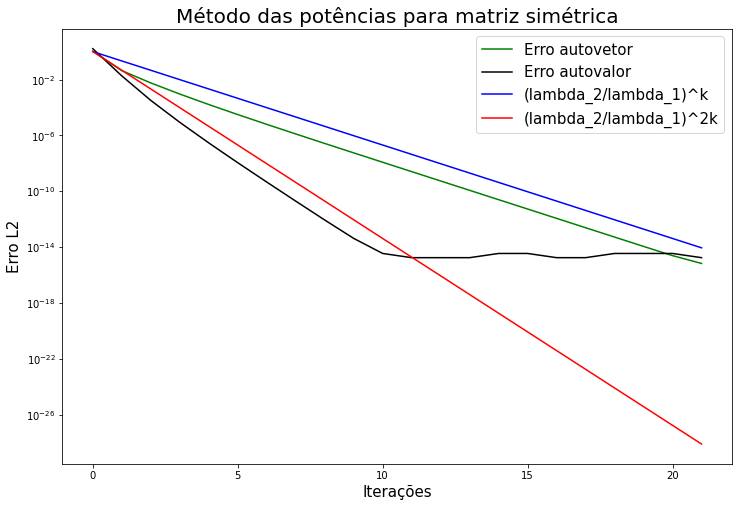

In [18]:
M1 = MetodoDasPotencias(A1, 70, 1e-15)
M1.calcula_aproximacao()
M1.gera_grafico_comparativo("Método das potências para matriz simétrica")

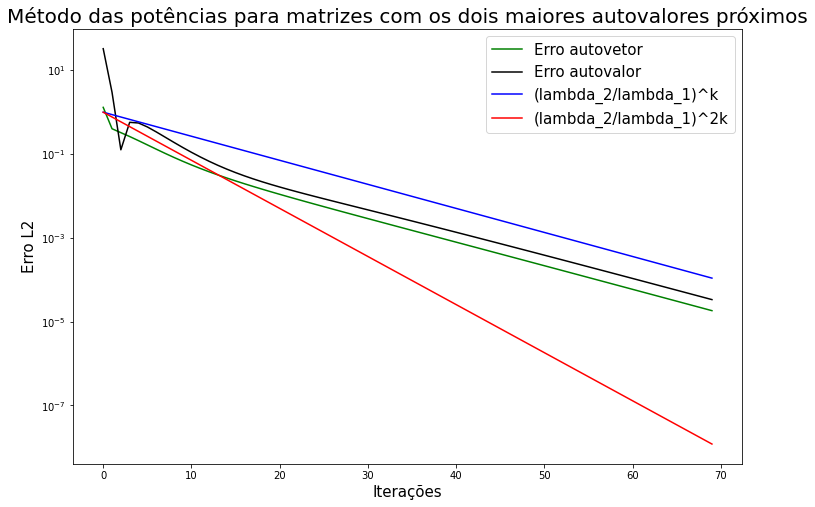

In [19]:
M21 = MetodoDasPotencias(A21, 70, 1e-15)
M21.calcula_aproximacao()
M21.gera_grafico_comparativo("Método das potências para matrizes com os dois maiores autovalores próximos")

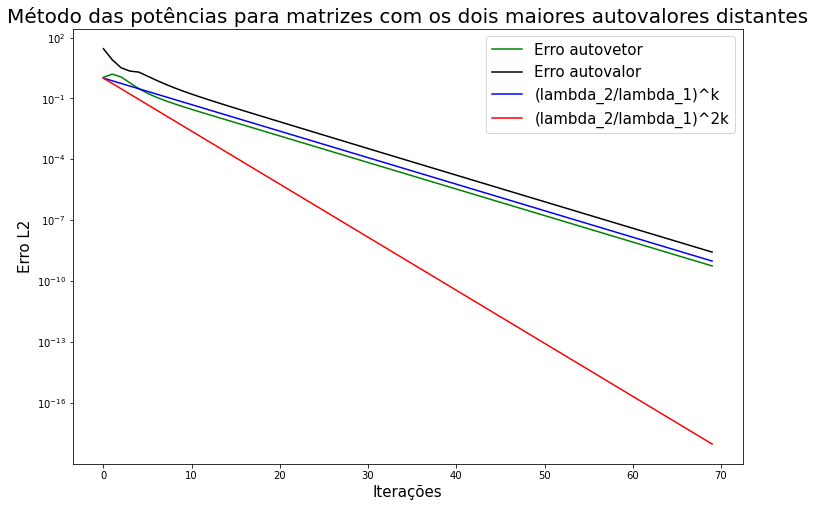

In [20]:
M22 = MetodoDasPotencias(A22, 70, 1e-15)
M22.calcula_aproximacao()
M22.gera_grafico_comparativo("Método das potências para matrizes com os dois maiores autovalores distantes")

In [21]:
M1.A

array([[0.17051463, 1.6237461 , 1.38462038, 1.22281179, 1.23890696,
        1.65630898, 1.08484005, 0.61856201, 1.19625238, 1.0558061 ],
       [1.6237461 , 1.54646513, 1.13958464, 0.63536891, 1.42838108,
        0.51685674, 0.5150195 , 0.92449135, 0.86321038, 0.94429435],
       [1.38462038, 1.13958464, 0.9489933 , 0.60925617, 0.71583598,
        0.80221421, 0.60251725, 1.17650382, 0.6701969 , 1.4838219 ],
       [1.22281179, 0.63536891, 0.60925617, 1.21483832, 0.83670213,
        0.77076574, 1.10084781, 1.35923738, 1.10276765, 1.10306458],
       [1.23890696, 1.42838108, 0.71583598, 0.83670213, 0.98313316,
        1.39073056, 1.60261264, 0.43617306, 1.3141646 , 0.57046673],
       [1.65630898, 0.51685674, 0.80221421, 0.77076574, 1.39073056,
        0.61878981, 1.09173683, 1.25251016, 0.25498298, 1.07592248],
       [1.08484005, 0.5150195 , 0.60251725, 1.10084781, 1.60261264,
        1.09173683, 0.6237405 , 1.07471313, 1.05053754, 1.30109561],
       [0.61856201, 0.92449135, 1.1765038

In [22]:
M1.mi[-1]

10.408955841652919

In [23]:
M21.A

array([[  7.04118903, -19.7155082 ,  -7.93999503,  -6.40677919,
         -4.00401075,  37.65560326,  35.19625493,  25.11640474,
        -37.07525968, -22.4459207 ],
       [-12.37802969, -33.27160344, -20.39189355,  -3.14943047,
          3.30137442,  77.26784942,  63.14760573,  42.90352228,
        -77.52552898, -28.08964194],
       [ -3.21864901,  -3.38241489,  12.34632419,  -4.61206869,
         -1.88392124,   6.3582982 ,  11.6223586 ,   7.73156013,
         -7.88500526, -10.25418829],
       [-10.14109892, -25.34951688, -10.7550899 ,   6.80954343,
          0.69810241,  43.95729956,  39.85016672,  26.74350575,
        -45.9373954 , -17.92621349],
       [  1.63168393,  -0.34156456,  -0.69897453,  -4.30000729,
          8.87721265,   9.51489737,   5.53659499,   4.21078032,
        -10.23458921,  -5.06987832],
       [ -7.50623629, -13.53936834,  -4.25590396,  -5.17273638,
         -0.25786194,  33.39951028,  24.52627178,  15.23117591,
        -21.63317927, -13.69312593],
       [ -

In [24]:
M21.mi[-1]

14.859966431658659

In [25]:
M22.A

array([[ 17.74988646, -12.92999882,  -2.98476039,  -5.51148418,
         -8.34485949,  26.83216589,  22.89341007,  16.41267457,
        -20.19578586, -23.40960939],
       [ 24.14492168,  43.74369189,  25.18514103,  -6.61824559,
         -9.63465139, -60.63820674, -48.72497758, -28.22746739,
         61.25393847,   5.38041532],
       [  4.18183369,   4.91235279,  15.69237873,  -1.4280803 ,
         -3.91686345, -10.79721423,  -7.61300396,  -1.51074603,
         10.67625126,   0.4001667 ],
       [ 16.17204874,  30.51044552,  19.86137198,   7.21438093,
         -4.52420591, -56.20542516, -46.44305275, -25.26405857,
         53.95156508,  13.34965293],
       [  4.68227466,  -2.81201604,   2.15874158,  -1.10225547,
          6.15598206,   3.68209687,   4.85126276,   1.6046517 ,
         -0.33288728,  -9.94663698],
       [ 10.70469824,  17.17503088,  12.66382528,  -2.15224703,
         -5.48075322, -22.23149339, -26.36907393, -12.71500246,
         32.21066169,   5.33619517],
       [ 1

In [26]:
M22.mi[-1]

18.750000002690648